## IMPORTS

In [1]:
import pandas as pd
import sys
from matplotlib import pyplot as plt
import pickle
from glob import glob


sys.path.append('../../')
from utils import clustering_utils, bokeh_ui_utils, file_utils, rna_seq_utils

/Users/michaelbertagna/anaconda3/envs/cdh2_bokeh.env/lib/python3.8/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/michaelbertagna/anaconda3/envs/cdh2_bokeh.env/lib/python3.8/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/michaelbertagna/anaconda3/env

In [2]:
full_filtered_df = pd.read_csv('../../active_fastas/rna_seq.csv')
full_filtered_norm_df = rna_seq_utils.normalize_expression_per_gene(full_filtered_df)

num_genes = full_filtered_df.shape[0]
num_genes

21524

In [3]:
full_filtered_df.sample(10)

,TTHERM_ID,000min_A,000min_B,030min_A,030min_B,060min_A,060min_B,090min_A,090min_B,120min_A,120min_B,150min_A,150min_B,180min_A,180min_B,210min_A,210min_B,240min_A,240min_B
5184,TTHERM_00395810,5.171540,3.878450,3.204880,3.356900,2.971460,3.070810,3.302240,2.954890,3.585460,3.007500,3.907240,3.172950,3.862520,3.221700,3.285150,3.608620,3.231880,3.245980
14935,YF00023308.t1,0.000000,0.164769,0.446346,1.684150,1.496850,4.225440,2.732690,5.588510,5.073670,7.849710,4.709390,9.704880,1.274110,4.508300,0.349920,1.958810,0.575981,1.225880
12877,TTHERM_00569410,143.103000,97.977300,48.189400,54.812000,52.669600,56.460000,62.165600,57.342600,56.896700,54.025700,70.892200,46.728200,116.850000,65.570900,137.090000,87.536600,111.784000,88.366600
10832,TTHERM_00685910,1.672250,2.258690,1.428320,2.730840,1.314540,1.679040,1.506090,2.202480,4.186000,4.443670,6.857920,5.577160,12.834500,8.491740,9.933750,10.884600,4.278720,8.485540
15456,TTHERM_00726000,1.344840,0.152766,1.751250,0.520327,1.618050,0.507086,1.001850,0.474979,1.072770,0.435801,0.553166,0.879134,0.295050,0.390760,0.259215,0.155434,0.800250,0.212983
18447,TTHERM_000621309,82.815900,38.629800,95.950800,38.389400,61.829100,41.155600,66.472900,42.465000,79.277900,53.050300,85.025300,57.158700,73.061100,73.236700,82.938200,68.711800,83.974600,67.766200
6338,TTHERM_00822240,0.237519,0.202192,0.225944,0.248593,0.191750,0.414881,0.469263,0.825434,1.225830,1.327000,3.072830,1.502700,3.251010,1.976030,1.167010,2.003210,0.336416,1.224360
11754,TTHERM_00191790,13.923300,8.643190,12.399600,12.398500,17.620700,13.949700,22.839800,16.480300,31.605900,18.050600,39.277200,16.323400,28.578000,22.529300,15.745000,21.122200,15.151300,16.862300
6627,TTHERM_00011800,3.172270,1.996420,4.374580,1.989040,3.009870,1.859470,3.210740,1.860750,3.191570,1.875000,2.915300,1.699220,3.057290,2.403600,2.998050,2.600410,2.532360,2.314520
4745,TTHERM_00865090,0.645099,0.310110,0.668580,0.338862,0.509711,0.219829,0.230457,0.192846,0.155635,0.168143,0.203885,0.128625,0.184202,0.145475,0.268288,0.177459,0.267258,0.200912


In [4]:
averaged_full_filtered_norm_df = rna_seq_utils.ari_mean_df_of_duplicates(full_filtered_norm_df)

cycle_expression_conflict_df = averaged_full_filtered_norm_df.loc[
    (averaged_full_filtered_norm_df['000min'] > 0.9)
    &
    (averaged_full_filtered_norm_df['210min'] < 0.1)
    &
    (averaged_full_filtered_norm_df['240min'] < 0.1)
]

In [5]:
cycle_expression_conflict_df

,TTHERM_ID,000min,030min,060min,090min,120min,150min,180min,210min,240min
0,TTHERM_00161861,1.087494,0.062343,0.288486,1.121427,0.938596,0.513654,0.588010,-0.395171,-1.189078
6,TTHERM_000161789,2.781482,1.003143,-0.861583,-1.065768,0.606502,0.115310,0.700044,-0.501116,-0.040519
8,TTHERM_00161780,1.096049,0.842081,0.198487,0.457871,0.543836,1.701776,0.483856,-0.802495,-1.235445
18,TTHERM_00161670,1.460445,-0.524039,-0.931117,-0.712812,0.238562,0.210397,-0.079935,-0.412285,-1.145525
24,TTHERM_00161580,1.740777,1.476005,0.294685,0.002938,-0.017767,0.550469,-0.449770,-0.599137,-0.445851
...,...,...,...,...,...,...,...,...,...,...
21515,YF00038368.t1,1.226718,-0.519094,-0.906267,-0.018819,0.089214,1.807650,-0.103961,-0.789088,-0.519985
21518,TTHERM_01068130,0.940676,0.477967,-1.429256,-1.575640,-1.042108,1.971190,-0.035602,-0.782939,-0.247323
21521,YF00038377.t1,1.720627,-0.790350,-0.928691,-0.618612,-0.682176,-0.412277,-0.279209,-0.345607,-0.571169
21522,TTHERM_000989489,0.957801,0.686296,0.501818,0.215133,0.855592,1.710860,0.331049,-0.390257,-1.067982


In [6]:
cycle_expression_conflict_df.to_csv('./cycle_expression_conflict.csv')

### LEIDEN CLUSTERING

In [7]:
phases = 'rna_seq'

In [8]:
metric = 'manhattan'
# metric='minkowski_3.0'

# resolution_param=0.050
resolution_param=0.005

n_neighbors = 3

dataset = 'rna_seq'

In [9]:
leiden_label_df_round_1, partition_stats, cluster_sizes, enriched_cluster_sizes =  clustering_utils.build_label_df(
    full_filtered_norm_df, 
    dataset,
    metric=metric, 
    n_neighbors=n_neighbors, 
    resolution_param=resolution_param, 
    partition_type = 'EXP', 
    n_jobs = -1, 
    random_state=42
    )

In [10]:
leiden_label_df_round_1_arranged = bokeh_ui_utils.arrange_modules(full_filtered_norm_df, leiden_label_df_round_1, phases) 
leiden_label_df_round_1_arranged_sorted = leiden_label_df_round_1_arranged.sort_values(by=['label', 'TTHERM_ID'], ascending=False)
leiden_label_df_round_1_arranged_sorted.to_csv('./rna_seq_label_df_round_1.csv', index=False)

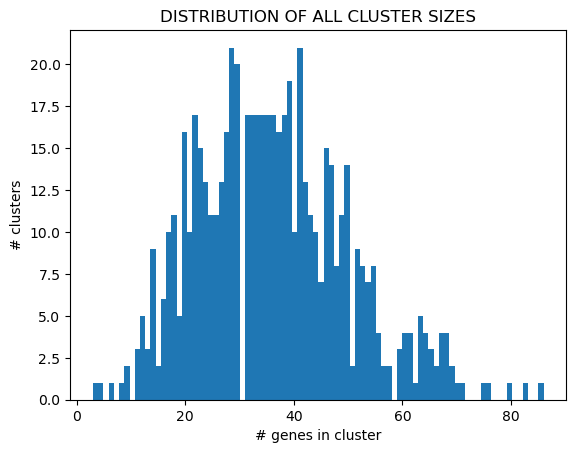

In [11]:
plt.hist(cluster_sizes, max(cluster_sizes))
plt.title('DISTRIBUTION OF ALL CLUSTER SIZES')
plt.xlabel('# genes in cluster')
plt.ylabel('# clusters')
plt.show()

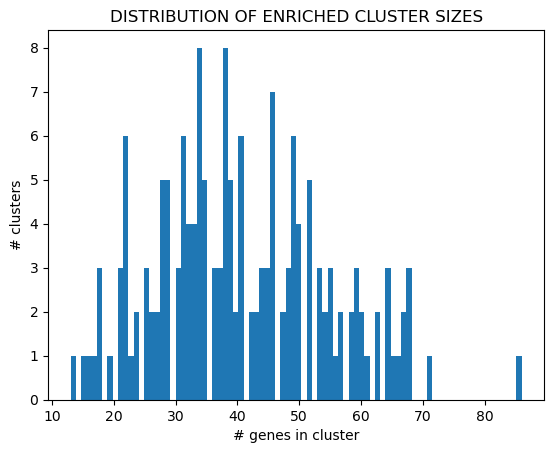

In [12]:
plt.hist(enriched_cluster_sizes, max(enriched_cluster_sizes))
plt.title('DISTRIBUTION OF ENRICHED CLUSTER SIZES')
plt.xlabel('# genes in cluster')
plt.ylabel('# clusters')
plt.show()

In [13]:
key_lens = [len(k) for k in partition_stats.keys()]
max_key_len = max(key_lens)

for k, v in partition_stats.items():
    print(f'{" " * (max_key_len - len(k))}{k}:', v)

              partition_type: EXP
              dimensionality: baseline
                      metric: manhattan
                       graph: umap_fuzzy_simplicial_set
                         nns: 3
                  clustering: leiden_cpm
                   parameter: 0.005
            silhouette_score: -0.059714844371329505
                  modularity: 0.7439338845972321
                   nclusters: 596
           mean_cluster_size: 36.11409395973154
         median_cluster_size: 35.0
             sd_cluster_size: 13.910924778961917
          nenriched_clusters: 164
  mean_enriched_cluster_size: 40.63414634146341
median_enriched_cluster_size: 39.0
    sd_enriched_cluster_size: 13.8070432672409
     nenriched_cluster_genes: 6664
                    datetime: 2024-05-08 14:29:49.829515


In [14]:
enrich_full_nn3 = clustering_utils.compute_enrichment(leiden_label_df_round_1_arranged_sorted)

In [15]:
outfile='../enrichment/test_nn3_full_enrichment.csv'
enrich_full_nn3.to_csv(outfile, index=False)

In [16]:
complete_annot = pd.read_csv('../eggnog/complete_eggnog_annotation.csv')

In [17]:
palette45 = """
#51635F\n#FF1C16\n#16FC26\n#403DFC\n#FE0DCE\n#F9AA00\n#00FFD5\n#22BFFE\n#BB3551\n#E6FE97\n#ECADFF\n#FFBFBD\n#CF00F5\n#0D8B00\n#D7FEFF\n#8D7200\n#F76C00\n#AD3288\n#5C5AB8\n#FC0080\n#B8FF16\n#00AAB4\n#FBE11C\n#9AAAD9\n#8BBB8C\n#934B47\n#6EFE99\n#9C6D91\n#FB9778\n#9D32AF\n#D40087\n#FFDC9D\n#FF8DB6\n#A96AFC\n#FDDDFB\n#168CF7\n#FD6CF9\n#F64553\n#4D6A00\n#FAFEDB\n#A7977D\n#0DFBFF\n#86B80D\n#FD8AE4\n#B7B126
""".split()

palette32 = """
white\n#F91622\n#16FC0D\n#5138FB\n#FD00CF\n#FDD51C\n#16FDD7\n#FC8B8E\n#16BFFF\n#DF9BFD\n#669C2A\n#FEE7C4\n#F31685\n#DF16FD\n#C1F1FE\n#A23D7E\n#D5FD0D\n#8C5A0D\n#FC790D\n#4F5CBC\n#FFCBEF\n#168D72\n#68FA93\n#C4FDC9\n#F7A449\n#16789B\n#AD0DAB\n#C4262E\n#0DF1FF\n#EFF994\n#B6C1FE\n#8F22CD
""".split()

palette35 = """
#585F6A\n#FE1626\n#00FB0D\n#2E40FC\n#FD0DCE\n#FCD200\n#F7868C\n#16FFDC\n#22BEFB\n#D28EF6\n#609000\n#FFE7C9\n#F51683\n#FF730D\n#CAFE16\n#AA3586\n#BEEEFD\n#BD00FA\n#895D22\n#FEC7F0\n#495AA1\n#73F995\n#229270\n#ED963B\n#F6FE97\n#C5FFD0\n#C50DC8\n#6993FF\n#C22A35\n#16ECFC\n#AA707E\n#7A3BCB\n#7C845C\n#358FAA\n#BDBAF6
""".split()

palette38 = """
#636265\n#F60D16\n#00F90D\n#3540FB\n#FD0DD0\n#FDDB0D\n#00FFE2\n#FA8884\n#2ABEFE\n#E5A3FF\n#518F00\n#FEFDD5\n#D51CFF\n#ED007F\n#A33879\n#96731C\n#C8FB16\n#C0ECFE\n#FBC1DA\n#5658BA\n#F96900\n#F69F1C\n#58FA9C\n#008E72\n#BA22B9\n#167D97\n#794D8A\n#CEFE9C\n#BB222E\n#954D45\n#00DCEF\n#FD66B0\n#B2FDD3\n#FDBD9F\n#A9B4F1\n#B371FE\n#849566\n#2A8EFF
""".split()

palette64 = """
white\n#FA002E\n#22FC22\n#221CFA\n#FF3DD6\n#FFDA00\n#00FEFB\n#F48684\n#CEB4FE\n#FFFFE5\n#0D933D\n#CC00F8\n#800D5D\n#F10084\n#22267A\n#0DADFF\n#CBFD71\n#9A761C\n#F96C00\n#6399A6\n#FFBCDA\n#8D0DA3\n#F79F26\n#00FFBF\n#A37CFB\n#F68EEB\n#720D0D\n#F163AA\n#7E926A\n#826386\n#B41C32\n#9BEBCE\n#E2DB83\n#56D4FA\n#E6E2FB\n#925D58\n#F7C3A7\n#62E970\n#220DBD\n#5583BB\n#7EA01C\n#CDFDB6\n#FD00FB\n#B30D97\n#F5FF00\n#DD77FD\n#4282FC\n#BBA6A4\n#0D8068\n#AB5F26\n#F7C26E\n#9EFE00\n#9B2EFD\n#C56887\n#FD3D68\n#ABF2FD\n#835FAC\n#FF16B1\n#325371\n#CA16CA\n#D26322\n#AFCFFE\n#91A1FA\nfloralwhite
""".split()

palette65 = """
white\ngainsboro\n#FA002E\n#22FC22\n#221CFA\n#FF3DD6\n#FFDA00\n#00FEFB\n#F48684\n#CEB4FE\n#FFFFE5\n#0D933D\n#CC00F8\n#800D5D\n#F10084\n#22267A\n#0DADFF\n#CBFD71\n#9A761C\n#F96C00\n#6399A6\n#FFBCDA\n#8D0DA3\n#F79F26\n#00FFBF\n#A37CFB\n#F68EEB\n#720D0D\n#F163AA\n#7E926A\n#826386\n#B41C32\n#9BEBCE\n#E2DB83\n#56D4FA\n#E6E2FB\n#925D58\n#F7C3A7\n#62E970\n#220DBD\n#5583BB\n#7EA01C\n#CDFDB6\n#FD00FB\n#B30D97\n#F5FF00\n#DD77FD\n#4282FC\n#BBA6A4\n#0D8068\n#AB5F26\n#F7C26E\n#9EFE00\n#9B2EFD\n#C56887\n#FD3D68\n#ABF2FD\n#835FAC\n#FF16B1\n#325371\n#CA16CA\n#D26322\n#AFCFFE\n#91A1FA\nfloralwhite
""".split()

In [18]:
palette36 = ["#FFFFFF", 
             "#E4E1E3", 
             "#F6222E", 
             "#FE00FA", 
             "#16FF32", 
             "#3283FE", 
             "#FEAF16", 
             "#B00068", 
             "#1CFFCE",
             "#90AD1C", 
             "#2ED9FF", 
             "#DEA0FD", 
             "#AA0DFE", 
             "#F8A19F", 
             "#325A9B", 
             "#C4451C", 
             "#1C8356", 
             "#85660D",
             "#B10DA1", 
             "#FBE426", 
             "#1CBE4F", 
             "#FA0087", 
             "#FC1CBF", 
             "#F7E1A0", 
             "#C075A6", 
             "#782AB6", 
             "#AAF400",
             "#BDCDFF", 
             "#822E1C", 
             "#B5EFB5", 
             "#7ED7D1", 
             "#1C7F93", 
             "#D85FF7", 
             "#683B79", 
             "#66B0FF", 
             "#3B00FB",
             "magenta"]

change index 5 to #778899. Change index 9 to #2F4F4F. Add #FF7F50. Change index 9 to #FFBCD9. Change index 14 to #DEA5A4

In [19]:
palette27 = ["#FFFFFF", 
             "#AA0DFE", 
             "#3283FE", 
             "#85660D", 
             "#782AB6", 
             "#778899", 
             "#1C8356", 
             "#16FF32", 
             "#F7E1A0", 
#              "#2F4F4F",
             "#FFBCD9", 
             "#C4451C", 
             "#DEA0FD", 
             "#FE00FA", 
#              "#325A9B", 
             "#FEAF16", 
             "#DEA5A4", 
             "#90AD1C", 
             "#F6222E",
             "#1CFFCE", 
             "#2ED9FF", 
             "#B10DA1", 
#              "#C075A6", 
#              "#FC1CBF", 
#              "#B00068", 
             "#FBE426", 
             "#FA0087",
             "#FF7F50"
            ]

In [20]:
with open(('colors_2000_1'), 'rb') as file:
    color_palette_raw = pickle.load(file)

color_palette = palette65

if len(color_palette_raw) >= max(leiden_label_df_round_1_arranged_sorted['label'].unique()) + 1:
    color_palette = color_palette_raw[:max(leiden_label_df_round_1_arranged_sorted['label'].unique()) + 1]

In [21]:
import os

embedding_metric = 'manhattan'

dashboard_path = file_utils.generate_uniquely_numbered_export_path('./plots/', 'dashboard', '.html', tags=['rna_seq', 'umap', metric, f'{n_neighbors}nn', f'{resolution_param}rp'])

p = bokeh_ui_utils.generate_and_save_umap(dashboard_path, full_filtered_norm_df, complete_annot, leiden_label_df_round_1_arranged_sorted, 'rna_seq', color_palette, os.path.basename(dashboard_path), expr_min=-3, expr_max=3, embedding_metric=embedding_metric, n_neighbors=n_neighbors)

/Users/michaelbertagna/git/TGNE-2022/TGNE/embedding/../../utils/bokeh_ui_utils.py:496: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hm_df['module'] = hover_data['module'].values


./plots/dashboard328_rna_seq_umap_manhattan_3nn_0.005rp.html


In [22]:
# (HH2A.1, HH2A.2, HH2B.1, HH2B.2, HH3, HH4.1, and HH4.2)
HHs = [
"TTHERM_00189170", "TTHERM_00143660", "TTHERM_00633360", "THERM_00283180", 
]

# (Figure 3A; CPD1, CPD2, and CPG3 and SMC2 and SMC4).
CPD_CPG_SMC = [
"TTHERM_00486070", "TTHERM_00392760", "TTHERM_00919690", "TTHERM_00812950", "TTHERM_0044640", 
]

# cyclin D family members, CYC4, CYC13, and CYC25
cyclin_D_family_members = [
"TTHERM_01043080", "TTHERM_01128530", "TTHERM_00717540",
]

# all cyclins
cyclins = [
'TTHERM_00196590',
'TTHERM_00433390',
'TTHERM_00526250',
'TTHERM_00962160',
'TTHERM_01128530',
'TTHERM_00189230',
'TTHERM_00425970',
'TTHERM_00780580',
'TTHERM_00693080',
'TTHERM_00827080',
'TTHERM_00698650',
'TTHERM_00079530',
'TTHERM_00624450',
'TTHERM_00784350',
'TTHERM_00933270',
'TTHERM_00732460',
'TTHERM_00842480',
'TTHERM_00717540',
'TTHERM_00066840',
'TTHERM_000576939',
'TTHERM_00082190',
'TTHERM_00649450',
'TTHERM_00180970',
'TTHERM_00726380',
'TTHERM_00013060',
'TTHERM_00049420',
'TTHERM_00294860',
'TTHERM_00535270',
'TTHERM_01043080',
'TTHERM_00192000',
'TTHERM_00194440',
'TTHERM_00293270',
'TTHERM_00332170',
'TTHERM_00940290',
]

cyc_subset = [
'TTHERM_00196590', # CYC1 
'TTHERM_00425970', # CYC15
'TTHERM_00624450', # CYC20
'TTHERM_00842480', # CYC24
'TTHERM_00194440', # CYC6
'TTHERM_00332170', # CYC8
]

all_cdks = [
'TTHERM_00411810', #	CDK1
'TTHERM_00318700', #	CDK10
'TTHERM_00576780', #	CDK11
'TTHERM_00267860', #	CDK13
'TTHERM_00394590', #	CDK14
'TTHERM_01035490', #	CDK15
'TTHERM_00624260', #	CDK16
'TTHERM_00066860', #	CDK17
'TTHERM_00784290', #	CDK18
'TTHERM_00339880', #	CDK19
'TTHERM_01347900', #	CDK20
'TTHERM_000837979', #	CDK21
'TTHERM_000937671', #	CDK22
'TTHERM_00011670', #	CDK3
'TTHERM_00286770', #	CDK4
'TTHERM_01080600', #	CDK5
'TTHERM_00837980', #	CDK6
'TTHERM_00133750', #	CDK7
'TTHERM_00717780', #	CDK8
'TTHERM_00185770', #	CDK9
'TTHERM_00483640', #	TCDK3
]

nucleic_acid_metabolic_process = [
'TTHERM_00046490',
'TTHERM_00535470',
'TTHERM_00312260',
'TTHERM_01079170',
'TTHERM_000378989',
'TTHERM_00825460',
'TTHERM_00298220',
'TTHERM_00684490',
'TTHERM_00433640',
'TTHERM_00787360',
'TTHERM_00112560',
'TTHERM_00561799',
'TTHERM_00723610',
'TTHERM_00794250',
]

telomere_maintenance = [
'TTHERM_000378989',
'TTHERM_00433640',
'TTHERM_00112560',
'TTHERM_00561799',
]

# DECENT
mitotic_nuclear_division = [
'TTHERM_00486070',
'TTHERM_00919690',
'TTHERM_00728870',
'TTHERM_00540340',
'TTHERM_00554600',
'TTHERM_01299730',
'TTHERM_00118700',
'TTHERM_00079520',
'TTHERM_00046490',
'TTHERM_00624870',
'TTHERM_000191179',
'TTHERM_00393260',
'TTHERM_00444760',
'TTHERM_00498210',
]

mitotic_cell_cycle = [
'TTHERM_00486070',
'TTHERM_00919690',
'TTHERM_00728870',
'TTHERM_00540340',
'TTHERM_00554600',
'TTHERM_01299730',
'TTHERM_00118700',
'TTHERM_00079520',
'TTHERM_00046490',
'TTHERM_00624870',
'TTHERM_000191179',
'TTHERM_00393260',
'TTHERM_00444760',
'TTHERM_00498210',
]

chromosome_organization = [
'TTHERM_00088010',
'TTHERM_00307700',
'TTHERM_00486070',
'TTHERM_00919690',
'TTHERM_00728870',
'TTHERM_00540340',
'TTHERM_00554600',
'TTHERM_01299730',
'TTHERM_00189170',
'TTHERM_00790790',
'TTHERM_00316500',
'TTHERM_00143660',
'TTHERM_00633360',
'TTHERM_00283180',
'TTHERM_00316410',
'TTHERM_00393260',
'TTHERM_00444760',
'TTHERM_00455130',
'TTHERM_000378989',
'TTHERM_00726370',
'TTHERM_00684490',
'TTHERM_00433640',
'TTHERM_00787360',
'TTHERM_00112560',
'TTHERM_00561799',
]

DNA_repair = [
'TTHERM_00307700',
'TTHERM_00046490',
'TTHERM_00624870',
'TTHERM_000191179',
'TTHERM_00312260',
'TTHERM_00316410',
'TTHERM_00439320',
'TTHERM_01050440',
'TTHERM_01079170',
'TTHERM_01106120',
'TTHERM_00726470',
'TTHERM_00455309',
'TTHERM_00825460',
'TTHERM_00726370',
'TTHERM_00142290',
'TTHERM_00684490',
'TTHERM_00433640',
'TTHERM_00561799',
'TTHERM_00723610',
'TTHERM_00888060',
'TTHERM_00864890',
'TTHERM_00829440',
'TTHERM_00794250',
]

microtubule_cytoskeleton_organi = [
'TTHERM_00335970'
'TTHERM_00426160'
'TTHERM_01220340'
'TTHERM_00522990'
'TTHERM_00338260'
'TTHERM_000727749'
'TTHERM_000123789'
'TTHERM_000161298'
'TTHERM_00030040'
'TTHERM_000357129'
'TTHERM_00046500'
'TTHERM_000488189'
'TTHERM_000706399'
'TTHERM_00088040'
'TTHERM_00133700'
'TTHERM_00266668'
'TTHERM_00346790'
'TTHERM_00452020'
'TTHERM_00493000'
'TTHERM_00755750'
'TTHERM_00842510'
'TTHERM_00992710'
]

# all MCMs
all_MCMs = [
'TTHERM_00554270',
'TTHERM_00092850',
'TTHERM_00277550',
'TTHERM_00069420',
'TTHERM_00448570',
'TTHERM_00011740',
'TTHERM_01031060',
'TTHERM_00703910',
'TTHERM_01207610',
]

MCM_subset = ['YF00026324.1', 'YF00025215.1', 'YF00018584.1', 'YF00012156.1']
# YF00026324, YF00025215, YF00018584, YF00012156
# MCM5, MCM6, MCM3, MCM2

mucocyst_cluster = [
'YF00036312.t1',
'YF00012829.t1',
'YF00000889.t1',
'TTHERM_00527180',
'TTHERM_00335830',
'YF00012830.t1',
'YF00009126.t1',
'YF00005954.t1',
'YF00005804.t1',
'TTHERM_01055600',
'TTHERM_00624720',
] # TTHERM_00630470: mucocyst gene with drastically different expression profile

histones = ['TTHERM_00146340', 'TTHERM_00446570', 'TTHERM_00498190', 'TTHERM_00189170', 'TTHERM_00189180', 'TTHERM_00016170', 'TTHERM_00016200', 'TTHERM_00790790', 'TTHERM_00316500', 'TTHERM_00143660', 'TTHERM_01079200', 'TTHERM_00633360', 'TTHERM_00283180', 'TTHERM_00354710', 'TTHERM_00474790', 'TTHERM_00852840', 'TTHERM_01194650']

In [23]:
gene_lists = {}
gene_lists = {
'HHs': HHs,
'CPD_CPG_SMC': CPD_CPG_SMC,
'cyclin_D_family_members': cyclin_D_family_members,
'cyclins': cyclins,
'cyc_subset': cyc_subset,
'all_cdks': all_cdks,
'nucleic_acid_metabolic_process': nucleic_acid_metabolic_process,
'telomere_maintenance': telomere_maintenance,
'mitotic_nuclear_division': mitotic_nuclear_division,
'mitotic_cell_cycle': mitotic_cell_cycle,
'chromosome_organization': chromosome_organization,
'DNA_repair': DNA_repair,
'microtubule_cytoskeleton_organi': microtubule_cytoskeleton_organi,
'all_MCMs': all_MCMs,
'MCM_subset': MCM_subset,
'mucocyst_cluster': mucocyst_cluster,
'histones' : histones,
}

In [24]:
xls_files = glob('../../new_raw_data/rna_seq_processed/xls_files/*.xls')
sorted(xls_files)

['../../new_raw_data/rna_seq_processed/xls_files/mc-e22-08-0326-s01.xls',
 '../../new_raw_data/rna_seq_processed/xls_files/mc-e22-08-0326-s02.xls',
 '../../new_raw_data/rna_seq_processed/xls_files/mc-e22-08-0326-s03.xls',
 '../../new_raw_data/rna_seq_processed/xls_files/mc-e22-08-0326-s04.xls',
 '../../new_raw_data/rna_seq_processed/xls_files/mc-e22-08-0326-s05.xls',
 '../../new_raw_data/rna_seq_processed/xls_files/mc-e22-08-0326-s06.xls',
 '../../new_raw_data/rna_seq_processed/xls_files/mc-e22-08-0326-s07.xls',
 '../../new_raw_data/rna_seq_processed/xls_files/mc-e22-08-0326-s08.xls',
 '../../new_raw_data/rna_seq_processed/xls_files/mc-e22-08-0326-s09.xls',
 '../../new_raw_data/rna_seq_processed/xls_files/mc-e22-08-0326-s10.xls']

In [25]:
for xls_file in xls_files:
    excel_file = pd.read_excel(xls_file, sheet_name=None)
    for sheet_name, df in excel_file.items():
        target_ids = []
        gene_cluster_assignments_mode_only = None

        first_column = list(df.iloc[:, 0].values)

        if sheet_name in gene_lists:
            name_num = 0
            new_sheet_name = sheet_name
            while new_sheet_name in gene_lists:
                name_num += 1
                new_sheet_name = f'{sheet_name}_{name_num}'
            print(f'WARNING: DUPLICATE GENE LIST NAME: \'{sheet_name}\'. RENAMING TO \'{new_sheet_name}\'.')
            sheet_name = new_sheet_name

        gene_lists[sheet_name] = first_column

In [26]:
fraction_threshold = 0.1

clustering_utils.multi_fraction_max_same_cluster_genes(gene_lists, leiden_label_df_round_1_arranged_sorted, fraction_threshold=fraction_threshold, print_mode=True)

GENE_LIST: HHs
TTHERM_00189170
TTHERM_00633360
THERM_00283180
Empty DataFrame
Columns: [TTHERM_ID, label]
Index: []



GENE_LIST: CPD_CPG_SMC
TTHERM_00919690
TTHERM_0044640
Empty DataFrame
Columns: [TTHERM_ID, label]
Index: []



GENE_LIST: cyclin_D_family_members
TTHERM_00717540
Empty DataFrame
Columns: [TTHERM_ID, label]
Index: []



GENE_LIST: cyclins
TTHERM_00693080
TTHERM_00717540
TTHERM_00082190
TTHERM_00535270
Empty DataFrame
Columns: [TTHERM_ID, label]
Index: []



GENE_LIST: cyc_subset
Empty DataFrame
Columns: [TTHERM_ID, label]
Index: []



GENE_LIST: all_cdks
TTHERM_000937671
TTHERM_00837980
Empty DataFrame
Columns: [TTHERM_ID, label]
Index: []



GENE_LIST: nucleic_acid_metabolic_process
TTHERM_00433640
TTHERM_00794250
Empty DataFrame
Columns: [TTHERM_ID, label]
Index: []



GENE_LIST: telomere_maintenance
TTHERM_00433640
Empty DataFrame
Columns: [TTHERM_ID, label]
Index: []



GENE_LIST: mitotic_nuclear_division
TTHERM_00919690
TTHERM_01299730
Empty DataFrame
Columns: [TTH

In [27]:
','.join(cyclins)

'TTHERM_00196590,TTHERM_00433390,TTHERM_00526250,TTHERM_00962160,TTHERM_01128530,TTHERM_00189230,TTHERM_00425970,TTHERM_00780580,TTHERM_00693080,TTHERM_00827080,TTHERM_00698650,TTHERM_00079530,TTHERM_00624450,TTHERM_00784350,TTHERM_00933270,TTHERM_00732460,TTHERM_00842480,TTHERM_00717540,TTHERM_00066840,TTHERM_000576939,TTHERM_00082190,TTHERM_00649450,TTHERM_00180970,TTHERM_00726380,TTHERM_00013060,TTHERM_00049420,TTHERM_00294860,TTHERM_00535270,TTHERM_01043080,TTHERM_00192000,TTHERM_00194440,TTHERM_00293270,TTHERM_00332170,TTHERM_00940290'